In [9]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)


## Extract the global_power_plant_database.csv Data

In [10]:
read_global_power_plant = pd.read_csv('../resources/global_power_plant_database.csv')
read_global_power_plant.head()

C:\Users\hoang\AppData\Local\Temp\ipykernel_14376\1594649928.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  read_global_power_plant = pd.read_csv('../resources/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


## Create clean data frame

In [11]:
from IPython.display import HTML

# Select analysis data
columns = ["country","country_long","name","capacity_mw","latitude","longitude","primary_fuel","other_fuel1"\
    "source","url","generation_gwh_2017","estimated_generation_gwh_2017"]
cleaned_global_power_plant_df = read_global_power_plant.loc[:, columns]

# Apply URL formatting
# cleaned_global_power_plant_df.to_html('../resources/output_file.html',render_links=True, escape=False)
HTML(cleaned_global_power_plant_df.head(5).to_html(render_links = True, escape= False))

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,source,url,generation_gwh_2017,estimated_generation_gwh_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,GEODB,http://globalenergyobservatory.org,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,Wiki-Solar,https://www.wiki-solar.org,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,Wiki-Solar,https://www.wiki-solar.org,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,GEODB,http://globalenergyobservatory.org,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,GEODB,http://globalenergyobservatory.org,NaN,350.80


In [7]:
# Get a brief summary of the DataFrame.
cleaned_global_power_plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        34936 non-null  object 
 1   country_long                   34936 non-null  object 
 2   name                           34936 non-null  object 
 3   capacity_mw                    34936 non-null  float64
 4   latitude                       34936 non-null  float64
 5   longitude                      34936 non-null  float64
 6   primary_fuel                   34936 non-null  object 
 7   source                         34921 non-null  object 
 8   url                            34918 non-null  object 
 9   generation_gwh_2017            9500 non-null   float64
 10  estimated_generation_gwh_2017  33138 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.9+ MB


## Analyse clean global power plant data

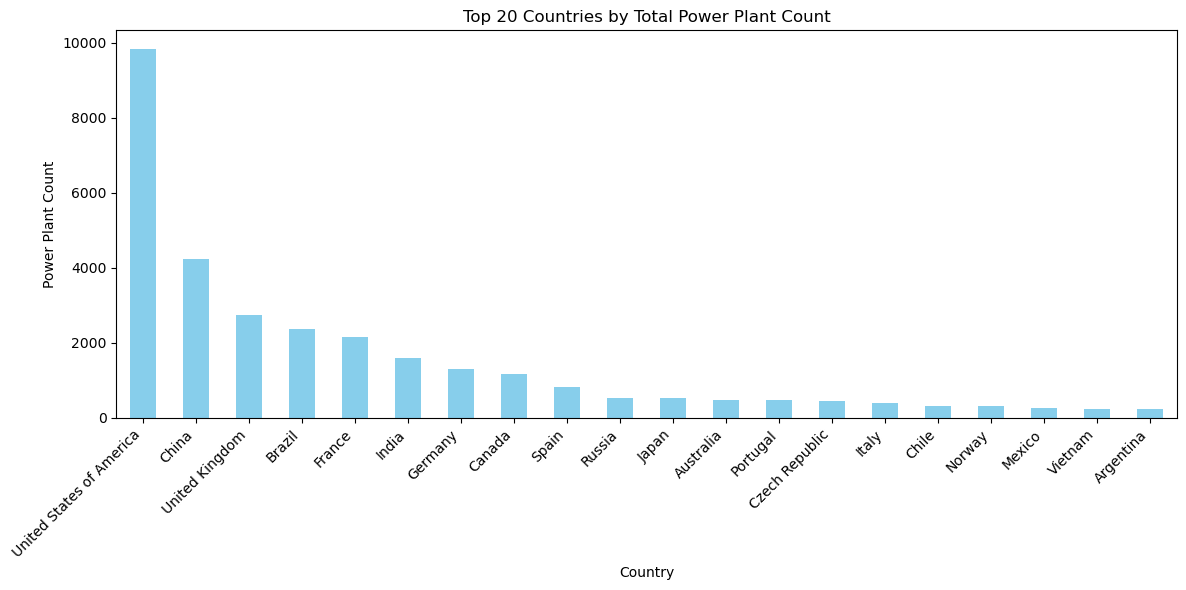

In [77]:
# Total plant count 
total_power_plant_count = pd.value_counts(cleaned_global_power_plant_df["country_long"])

# Select top 20 countries and plot a chart
top_20_countries = total_power_plant_count.head(20)

# Plotting a bar chart
plt.figure(figsize=(12, 6))
top_20_countries.plot(kind='bar', color='skyblue')
plt.title('Top 20 Countries by Total Power Plant Count')
plt.xlabel('Country')
plt.ylabel('Power Plant Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

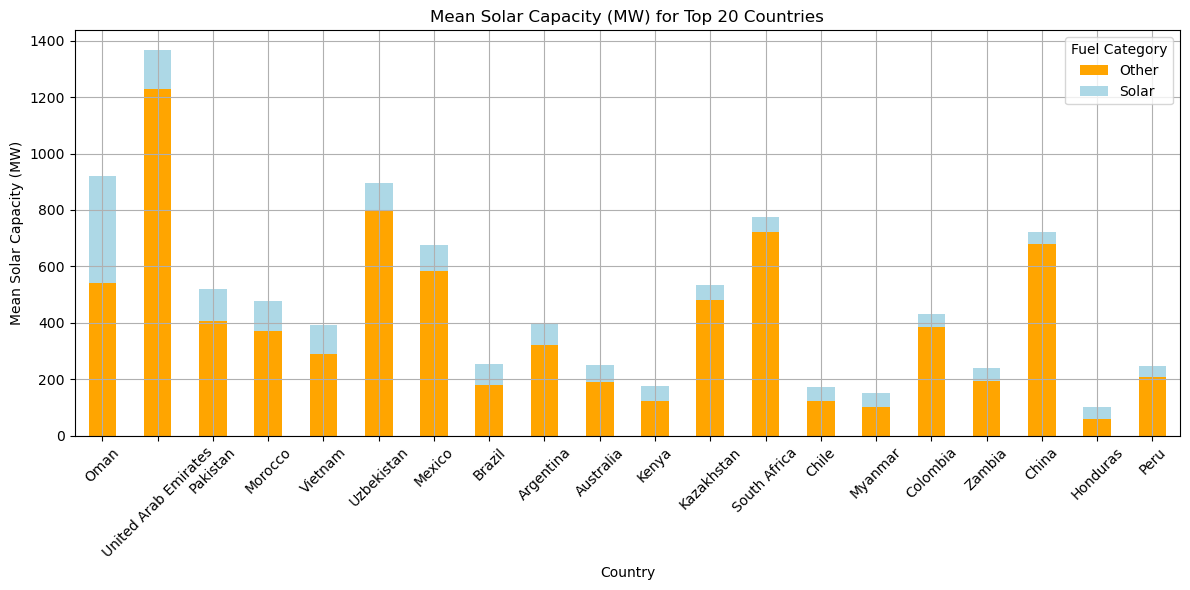

In [89]:

mean_capacity_by_fuel_and_country = cleaned_global_power_plant_df.groupby(['country_long', 'primary_fuel'])['capacity_mw'].mean().reset_index()

# Create a new column to categorize solar and non-solar
mean_capacity_by_fuel_and_country['fuel_category'] = mean_capacity_by_fuel_and_country['primary_fuel'].apply(lambda x: 'Solar' if x == 'Solar' else 'Other')

# Pivot table for mean capacity
pivot_table_capacity = mean_capacity_by_fuel_and_country.pivot_table(index='country_long', columns='fuel_category', values='capacity_mw', aggfunc='mean')

# Select the top 20 countries by mean solar capacity for plotting
top_20_solar_countries = pivot_table_capacity['Solar'].nlargest(20).index
pivot_table_capacity_top_20_solar = pivot_table_capacity.loc[top_20_solar_countries]

# Plotting side-by-side bar charts for comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for mean capacity (top 20 solar countries)
pivot_table_capacity_top_20_solar.plot(kind='bar', stacked=True, ax=ax, color=['orange', 'lightblue'])
ax.set_title('Mean Solar Capacity (MW) for Top 20 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Mean Solar Capacity (MW)')
ax.legend(title='Fuel Category')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

plt.tight_layout()
plt.show()



## Analyse data of 2017 from global_power_plant.csv

In [27]:
# clean data by replacing null with None and remove the \n from the data
cleaned_generataion_2017_df = cleaned_global_power_plant_df.dropna(how="any")
cleaned_generataion_2017_df.reset_index(drop=True, inplace=True)
cleaned_generataion_2017_df.head(5)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,source,url,generation_gwh_2017,estimated_generation_gwh_2017
0,AUS,Australia,Albany Wind Farm,21.6,-35.0641,117.7977,Wind,Australian Renewable Energy Mapping Infrastructure,https://www.nationalmap.gov.au/,85.900278,56.49
1,AUS,Australia,Angaston,50.0,-34.5034,139.0246,Oil,Australian Renewable Energy Mapping Infrastructure,https://www.nationalmap.gov.au/,7.649722,96.56
2,AUS,Australia,Appin (Mine),55.6,-34.2082,150.7722,Gas,Australian Renewable Energy Mapping Infrastructure,https://www.nationalmap.gov.au/,64.534722,154.20
3,AUS,Australia,Bairnsdale,94.0,-37.8429,147.5639,Gas,Australian Renewable Energy Mapping Infrastructure,https://www.nationalmap.gov.au/,168.524444,260.70
4,AUS,Australia,Ballarat Base Hospital,3.0,-37.5596,143.8469,Gas,Australian Renewable Energy Mapping Infrastructure,https://www.nationalmap.gov.au/,6.663333,8.32


In [28]:
cleaned_generataion_2017_df.shape

(9241, 11)

United States of America    8125
India                        428
Australia                    239
Italy                         90
Germany                       70
Spain                         52
France                        40
Poland                        24
Greece                        23
Sweden                        20
Austria                       19
Belgium                       16
Romania                       15
Denmark                       12
Czech Republic                11
Portugal                      10
Finland                        9
Netherlands                    8
Slovakia                       5
Hungary                        5
Slovenia                       4
Bulgaria                       3
United Kingdom                 2
Latvia                         2
Morocco                        2
Montenegro                     2
Lithuania                      2
Estonia                        2
Luxembourg                     1
Name: country_long, dtype: int64


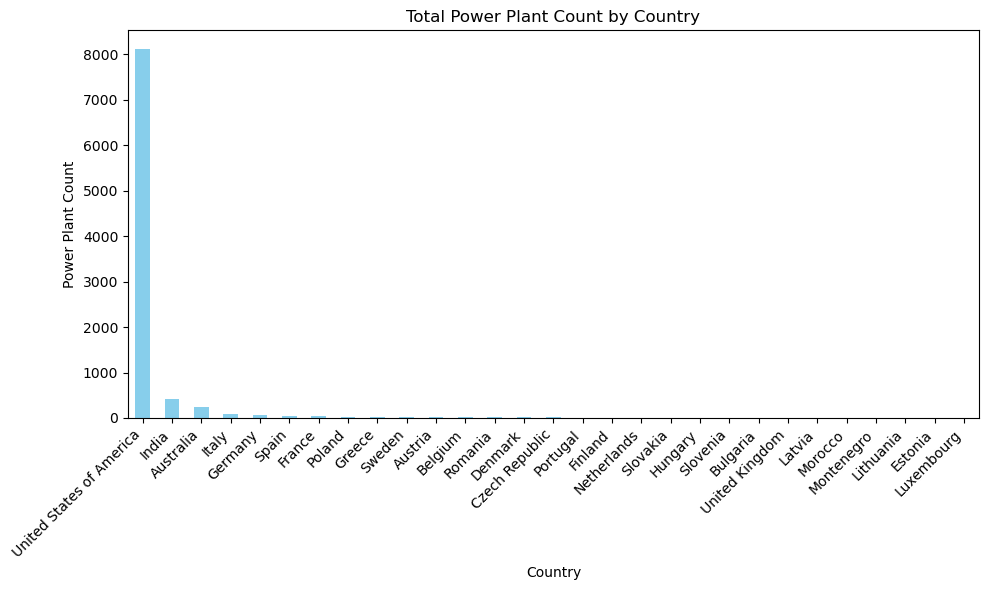

In [62]:
# Count the total number of power plants in each country  
power_plant_count_2017 = pd.value_counts(cleaned_generataion_2017_df["country_long"])
print(power_plant_count_2017)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
power_plant_count_2017.plot(kind='bar', color='skyblue')
plt.title('Total Power Plant Count by Country with generation report in 2017')
plt.xlabel('Country')
plt.ylabel('Power Plant Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Solar         2299
Gas           1929
Hydro         1776
Wind          1069
Oil            832
Coal           594
Waste          553
Nuclear        109
Geothermal      63
Other           17
Name: primary_fuel, dtype: int64


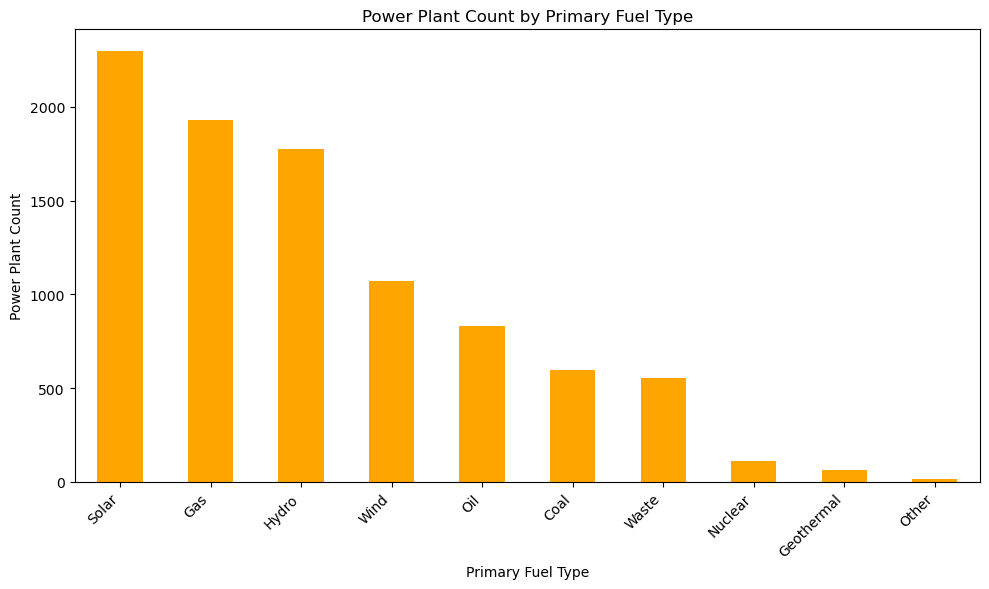

In [60]:
# Power Plant count by Primary Fuel Type
solar_plant_count = pd.value_counts(cleaned_generataion_2017_df["primary_fuel"])
print(solar_plant_count)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
solar_plant_count.plot(kind='bar', color='orange')
plt.title('Power Plant Count by Primary Fuel Type with generation report in 2017')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Power Plant Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [61]:
# Count the number of solar plants in each country
solar_plants_by_country = \
    cleaned_generataion_2017_df[cleaned_generataion_2017_df["primary_fuel"] == "Solar"].groupby("country_long").size()

solar_plants_by_country


country_long
Australia                      5
Italy                          1
United States of America    2293
dtype: int64

<Figure size 1500x600 with 0 Axes>

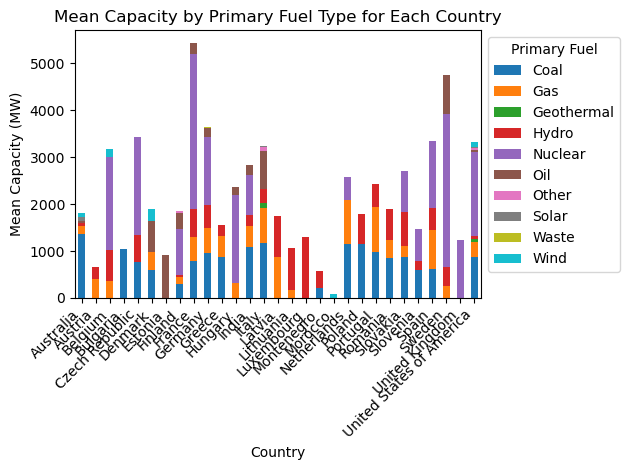

In [72]:
# calculate the mean capacity_mw for each primary fuel type in each country
mean_capacity_by_fuel_and_country = cleaned_generataion_2017_df.groupby(['country_long', 'primary_fuel'])['capacity_mw'].mean().reset_index()
mean_capacity_by_fuel_and_country

# Pivot the table to have primary fuel types as columns
pivot_table = mean_capacity_by_fuel_and_country.pivot_table(index='country_long', columns='primary_fuel', values='capacity_mw', aggfunc='mean')

# Plotting a bar chart
plt.figure(figsize=(15, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Mean Capacity by Primary Fuel Type for Each Country with generation report in 2017')
plt.xlabel('Country')
plt.ylabel('Mean Capacity (MW)')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

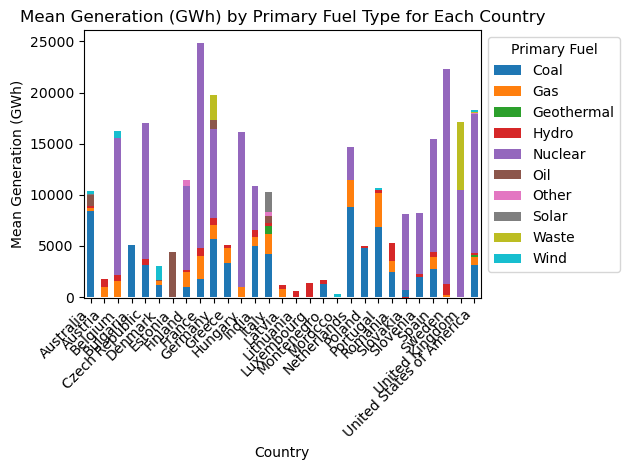

In [79]:
# calculate the mean generation_gwh_2017 for each primary fuel type in each country
mean_generation_by_fuel_and_country = cleaned_generataion_2017_df.groupby(['country_long', 'primary_fuel'])['generation_gwh_2017'].mean().reset_index()

# Pivot the table to have primary fuel types as columns
pivot_table = mean_generation_by_fuel_and_country.pivot_table(index='country_long', columns='primary_fuel', values='generation_gwh_2017', aggfunc='mean')

# Plotting a bar chart
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Mean Generation (GWh) by Primary Fuel Type for Each Country')
plt.xlabel('Country')
plt.ylabel('Mean Generation (GWh)')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

C:\Users\hoang\AppData\Local\Temp\ipykernel_14376\1354068510.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


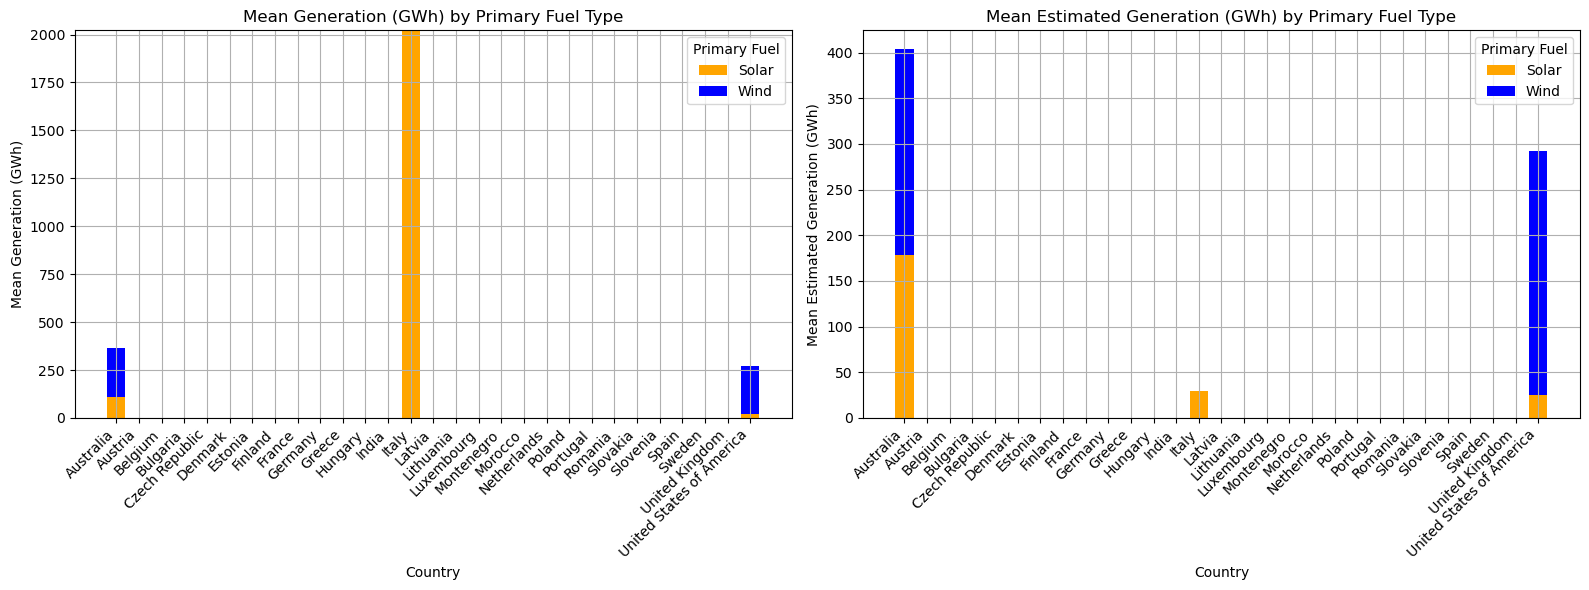

In [81]:
mean_generation_by_fuel_and_country = cleaned_generataion_2017_df.groupby(['country_long', 'primary_fuel'])['generation_gwh_2017'].mean().reset_index()
mean_estimated_generation_by_fuel_and_country = cleaned_generataion_2017_df.groupby(['country_long', 'primary_fuel'])['estimated_generation_gwh_2017'].mean().reset_index()

# Pivot tables for mean generation and mean estimated generation
pivot_table_generation = mean_generation_by_fuel_and_country.pivot_table(index='country_long', columns='primary_fuel', values='generation_gwh_2017', aggfunc='mean')
pivot_table_estimated_generation = mean_estimated_generation_by_fuel_and_country.pivot_table(index='country_long', columns='primary_fuel', values='estimated_generation_gwh_2017', aggfunc='mean')

# Plotting side-by-side bar charts for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar chart for mean generation
axes[0].bar(pivot_table_generation.index, pivot_table_generation['Solar'], label='Solar', color='orange')
axes[0].bar(pivot_table_generation.index, pivot_table_generation['Wind'], bottom=pivot_table_generation['Solar'], label='Wind', color='blue')
axes[0].set_title('Mean Generation (GWh) by Primary Fuel Type')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Mean Generation (GWh)')
axes[0].legend(title='Primary Fuel')
axes[0].grid(True)

# Bar chart for mean estimated generation
axes[1].bar(pivot_table_estimated_generation.index, pivot_table_estimated_generation['Solar'], label='Solar', color='orange')
axes[1].bar(pivot_table_estimated_generation.index, pivot_table_estimated_generation['Wind'], bottom=pivot_table_estimated_generation['Solar'], label='Wind', color='blue')
axes[1].set_title('Mean Estimated Generation (GWh) by Primary Fuel Type')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Mean Estimated Generation (GWh)')
axes[1].legend(title='Primary Fuel')
axes[1].grid(True)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

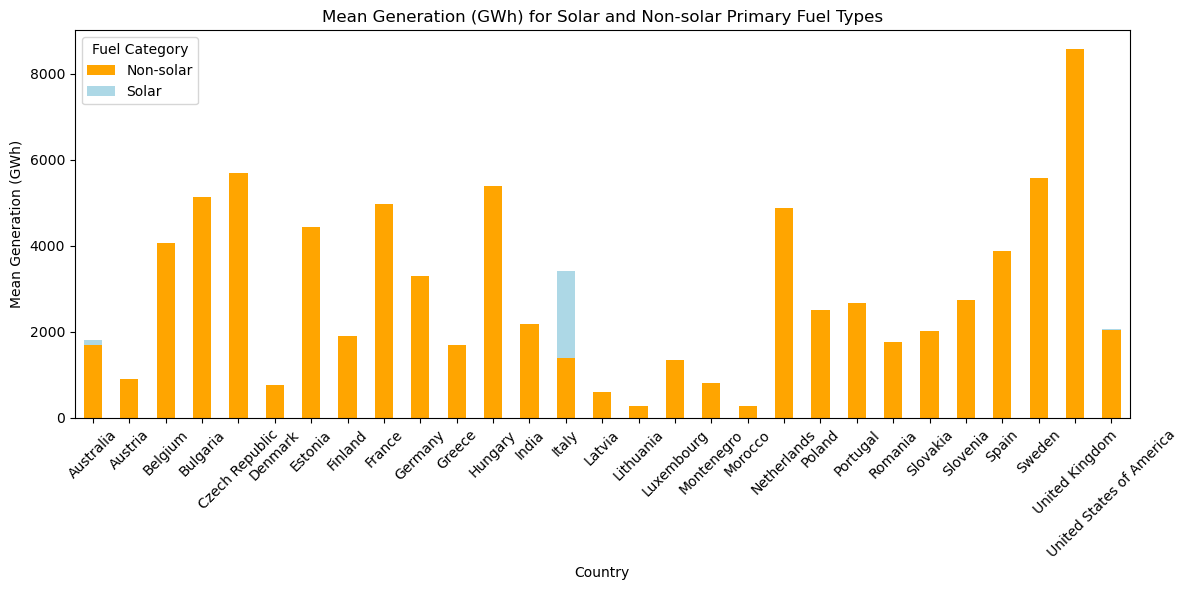

In [86]:
mean_generation_by_fuel_and_country = cleaned_generataion_2017_df.groupby(['country_long', 'primary_fuel'])['generation_gwh_2017'].mean().reset_index()

# Create a new column to categorize solar and non-solar
mean_generation_by_fuel_and_country['fuel_category'] = mean_generation_by_fuel_and_country['primary_fuel'].apply(lambda x: 'Solar' if x == 'Solar' else 'Non-solar')

# Pivot table for mean generation
pivot_table_generation = mean_generation_by_fuel_and_country.pivot_table(index='country_long', columns='fuel_category', values='generation_gwh_2017', aggfunc='mean')

# Plotting side-by-side bar charts for comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for mean generation
pivot_table_generation.plot(kind='bar', stacked=True, ax=ax, color=['orange', 'lightblue'])
ax.set_title('Mean Generation (GWh) for Solar and Non-solar Primary Fuel Types')
ax.set_xlabel('Country')
ax.set_ylabel('Mean Generation (GWh)')
ax.legend(title='Fuel Category')
ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


In [ ]:
# convert dataframe into json final combine file
.to_json('../Resources/finalcombine.json', indent=3)

# Import JSON file to SQLite database

In [ ]:
import sqlite3
import json

# Connect to the SQLite database
conn = sqlite3.connect('JSearchdata.sqlite')
cursor = conn.cursor()

# Read JSON data from a file
with open('../Resources/finalcombine.json', 'r') as file:
    data = json.load(file)

# Ensure that data is a dictionary
if not isinstance(data, dict):
    raise ValueError("The JSON data should be a dictionary")

# Extract keys from the JSON data and convert to a list
keys = list(data.keys())

# Create a list of objects from the JSON data
objects = []
for i in range(len(data[keys[0]])):
    obj = {}
    for key in keys:
        # Replace periods with underscores in column names
        column_name = key.replace(".", "_")
        obj[column_name] = data[key][str(i)]
    objects.append(obj)

# Create the table based on the keys in the first object
if objects:
    first_item = objects[0]

    # Create the table with columns based on keys
    create_table_sql = f'''
        CREATE TABLE IF NOT EXISTS jobs (
            id INTEGER PRIMARY KEY,
            {', '.join([f'"{key}" TEXT' for key in first_item.keys()])}
        )
    '''
    cursor.execute(create_table_sql)

# Insert JSON data into the table
for item in objects:
    # Prepare column names and values for insertion
    columns = ', '.join(item.keys())
    values = ', '.join(['?'] * len(item))
    insert_sql = f'INSERT INTO jobs ({columns}) VALUES ({values})'
    cursor.execute(insert_sql, tuple(item.values()))

# Commit the changes and close the connection
conn.commit()
conn.close()